In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas

def get_bbox_from_mask(mask):

    seg_value = 1

    if mask is not None:
        np_seg = np.array(mask)
        segmentation = np.where(np_seg == seg_value)

        # Bounding Box
        bbox = 0, 0, 0, 0
        if len(segmentation) != 0 and len(segmentation[1]) != 0 and len(segmentation[0]) != 0:
            x_min = int(np.min(segmentation[1]))
            x_max = int(np.max(segmentation[1]))
            y_min = int(np.min(segmentation[0]))
            y_max = int(np.max(segmentation[0]))
            bbox = x_min, y_min, x_max, y_max
            return bbox
        
        return None
    else:
        # Handle error case where segmentation image cannot be read or is empty
        print("Error: Segmentation image could not be read or is empty.")
        return None


def get_data_from_gallery(path):

    mask = plt.imread(path)

    x_min, y_min, x_max, y_max = get_bbox_from_mask(mask)

    height = y_max - y_min
    width = x_max - x_min
    area = cv2.countNonZero(mask)

    return {
        'heigth':height,
        'width':width,
        'area':area
    }

183 167 11287


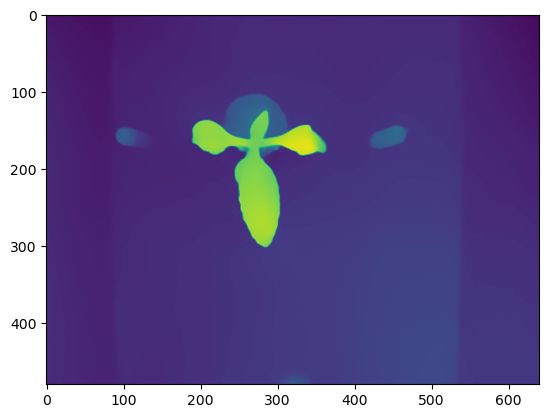

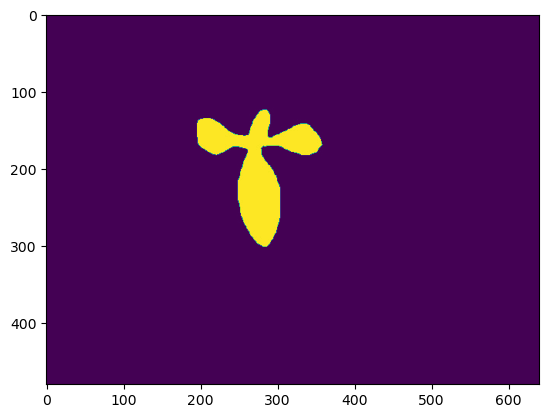

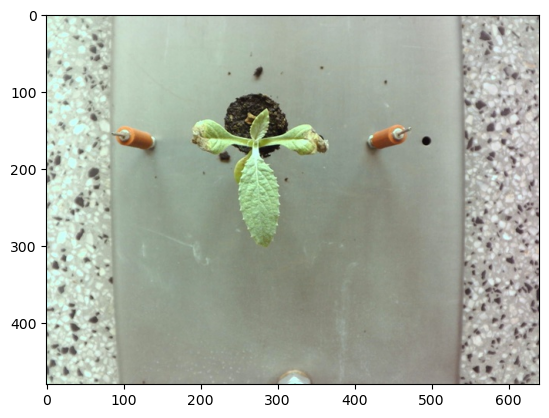

In [5]:
type = 'vertical'
img = plt.imread(f"../24_03_23/{type}/rgb/seedlings_{1}_{5}.jpg")
depth = plt.imread(f"../24_03_23/{type}/depth/seedlings_{1}_{5}.jpg")
mask = plt.imread(f"../24_03_23/{type}/mask/seedlings_mask_{1}_{5}.jpg")

x_min, y_min, x_max, y_max = get_bbox_from_mask(mask)

vertical_height = y_max - y_min
vertical_width = x_max - x_min
vertical_area = cv2.countNonZero(mask)

print(vertical_height, vertical_width, vertical_area)

plt.imshow(depth)
plt.show()
plt.imshow(mask)
plt.show()
plt.imshow(img)
plt.show()


In [9]:
dataset = {
    'vertical_area': [],
    'vertical_heigth': [],
    'vertical_width': [],
    'horizontal_area': [],
    'horizontal_heigth': [],
    'horizontal_width': [],
}

type = 'vertical'
path = f"../24_03_23/{type}/mask/seedlings_mask_{1}_{5}.jpg"
data = get_data_from_gallery(path)
dataset[f'{type}_area'].append(data['area'])
dataset[f'{type}_width'].append(data['width'])
dataset[f'{type}_heigth'].append(data['heigth'])


type = 'horizontal'
path = f"../24_03_23/{type}/mask/seedlings_mask_{1}_{5}.jpg"
data = get_data_from_gallery(path)
dataset[f'{type}_area'].append(data['area'])
dataset[f'{type}_width'].append(data['width'])
dataset[f'{type}_heigth'].append(data['heigth'])

dataframe = pandas.DataFrame(dataset)
dataframe.to_csv('dataseed.csv', index=False)

dataframe

,vertical_area,vertical_heigth,vertical_width,horizontal_area,horizontal_heigth,horizontal_width
0,11287,183,167,3549,71,86
